In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
y = data.Outcome
x = data.drop(["Outcome"], axis=1)
y.shape, x.shape

((768,), (768, 8))

In [25]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x, y)

C:\Users\Drama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252371e-01  3.36004124e-02 -1.40872277e-02 -1.27028786e-03
 -1.24035324e-03  7.72017152e-02  1.41904355e+00  1.00348409e-02]


In [26]:
_ = [print(k, v) for k, v in zip(x.columns, logistic.coef_[0])]

Pregnancies 0.11725237059837641
Glucose 0.03360041238243367
BloodPressure -0.014087227718032776
SkinThickness -0.0012702878639660748
Insulin -0.0012403532426630203
BMI 0.07720171522987836
DiabetesPedigreeFunction 1.4190435452408545
Age 0.010034840926411636


In [12]:
#Свободный коэффициент
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70296191]


In [27]:
y_pred = logistic.predict(x)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [28]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]], dtype=int64)

<AxesSubplot:>

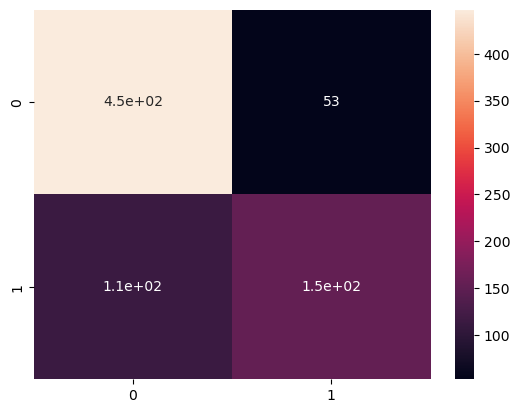

In [29]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [30]:
logistic.score(x, y)

0.7825520833333334

Значение метрики (0,78) показывает, что модель в среднем делает ошибки в 22% процентов случаев. Это основной показатель качества модели. В дальнейших работах мы покажем, как его замерять более правильно.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly = PolynomialFeatures(2)
poly = poly.fit_transform(x)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [20]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

C:\Users\Drama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
polynomial.score(poly, y)

0.7213541666666666

Вывод - полиномиальная модель менее точная, чем логистическая

In [22]:
def rate(y, y_pred): # Функция, оценивающая эффективность модели в процентах
    cm = metrics.confusion_matrix(y, y_pred, normalize='all')
    sns.heatmap(cm, annot=True, fmt='.2%')

    acc = metrics.accuracy_score(y, y_pred)
    print(f'accuracy = {acc:.2%}')

## Задание 1

Изучите документацию `sklearn`, посвященную классу `LogisticRegression`. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

accuracy = 78.12%


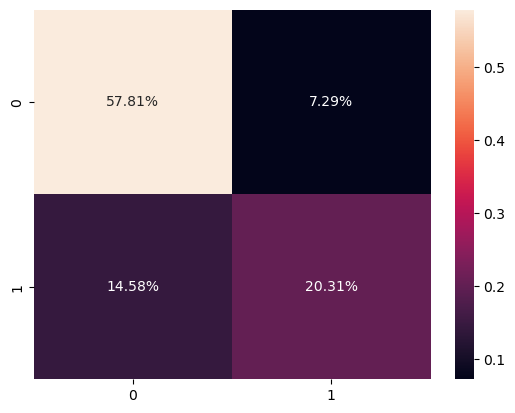

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

lr = LogisticRegression(max_iter=1000)
lr.fit(x, y)
y_pred = lr.predict(x)

rate(y, y_pred)

### `get_params()`

In [33]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

accuracy = 69.40%


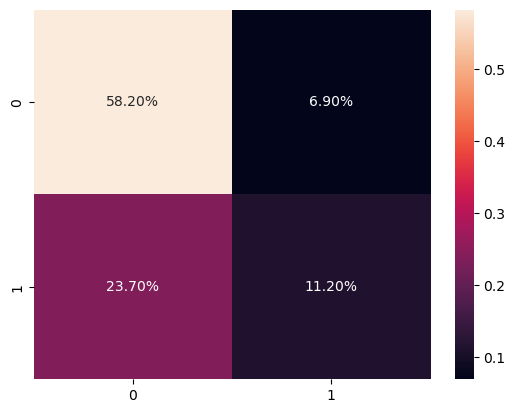

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

lr = LogisticRegression(max_iter=10_000, solver='saga')
lr.fit(x, y)
y_pred = lr.predict(x)

# Точность и скорость обучения упали.
rate(y, y_pred)

## Задание 2

Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
1. Метод опорных векторов
    1. Без ядра
    1. С линейным ядром
    1. С гауссовым ядром
    1. С полиномиальным ядром
1. Метод ближайших соседей
1. Многослойный перцептрон
1. Дерево решений
1. Наивный байесовский классификатор
1. (\*) Другие методы:
    1. Пассивно-агрессивный классификатор
    1. Гребневый классификатор
    1. Случайный лес
    1. Беггинг
    1. Другие модели по желанию

### Метод опорных векторов

In [13]:
from sklearn.svm import SVC

#### RBF kernel (Гауссово)

accuracy = 76.82%


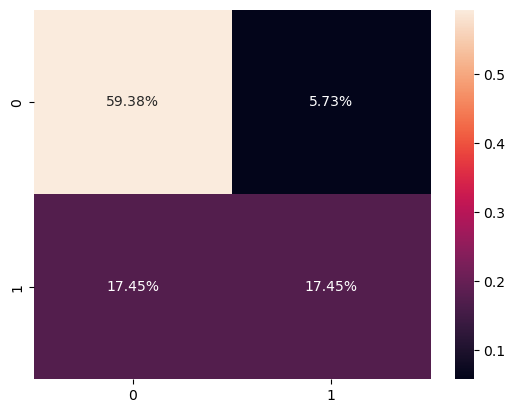

In [14]:
c = SVC()
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

#### Linear kernel

accuracy = 77.60%


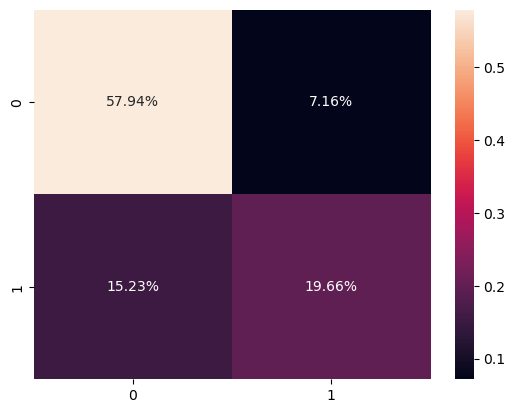

In [16]:
c = SVC(kernel='linear')
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

#### Polynomial kernel

accuracy = 77.60%


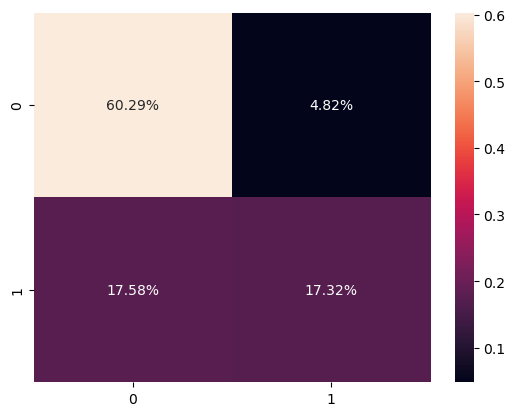

In [18]:
c = SVC(kernel='poly')
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

#### Sigmoid kernel (без ядра)

accuracy = 49.61%


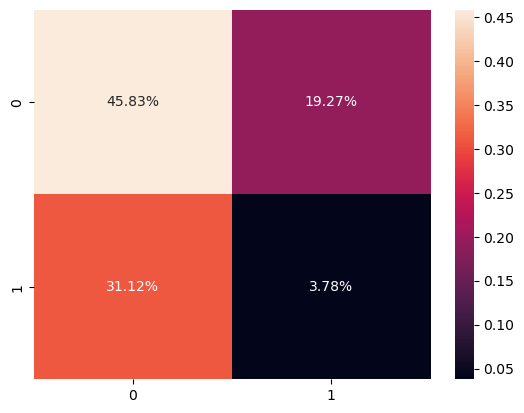

In [19]:
c = SVC(kernel='sigmoid')
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

### Метод ближайших соседей

In [20]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

#### k-ближайших соседей

accuracy = 85.68%


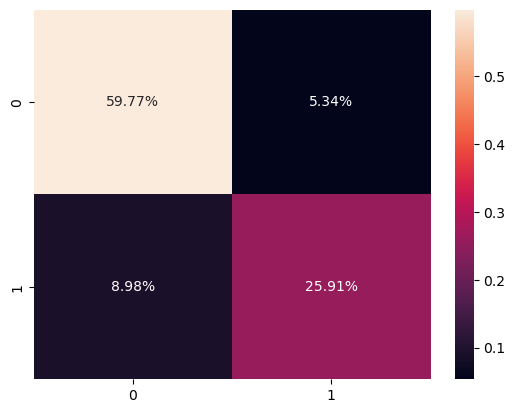

In [32]:
c = KNeighborsClassifier(n_neighbors=3)
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

#### В заданном радиусе

accuracy = 100.00%


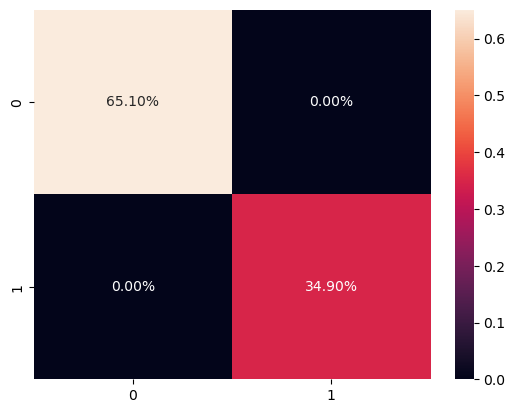

In [37]:
c = RadiusNeighborsClassifier()
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

### Многослойный перцептрон

In [38]:
from sklearn.neural_network import MLPClassifier

accuracy = 73.18%


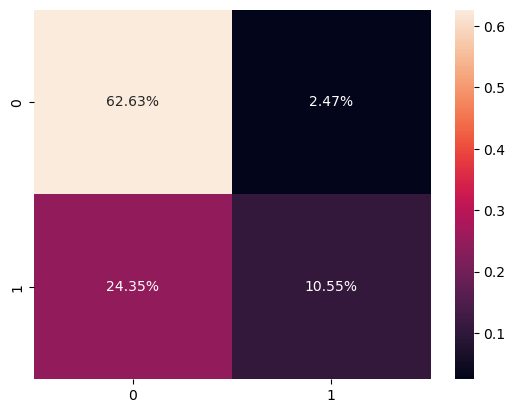

In [49]:
c = MLPClassifier(hidden_layer_sizes=(90, 60, 90), max_iter=666)
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

### Дерево решений

In [50]:
from sklearn.tree import DecisionTreeClassifier

accuracy = 100.00%


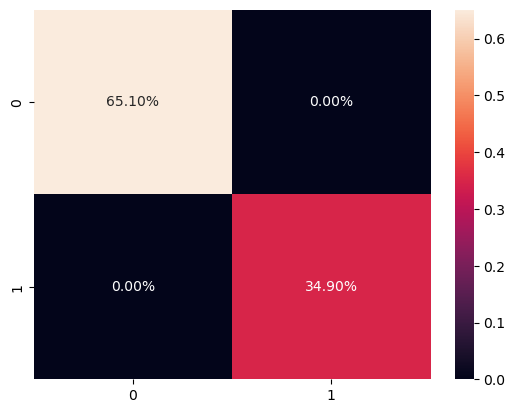

In [52]:
c = DecisionTreeClassifier()
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

### Наивный Байесовский классификатор

In [54]:
from sklearn.naive_bayes import GaussianNB

accuracy = 76.30%


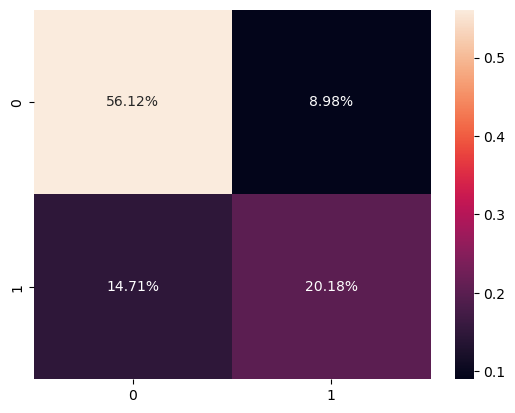

In [55]:
c = GaussianNB()
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

## Данные ириса

In [60]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)

### Метод опорных векторов

#### RBF kernel (Гауссово)

accuracy = 97.33%


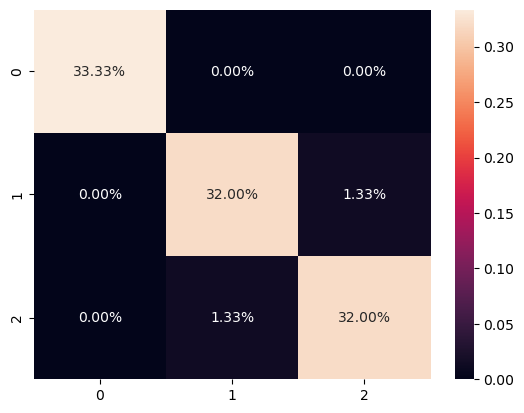

In [61]:
c = SVC()
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

#### Linear kernel

accuracy = 99.33%


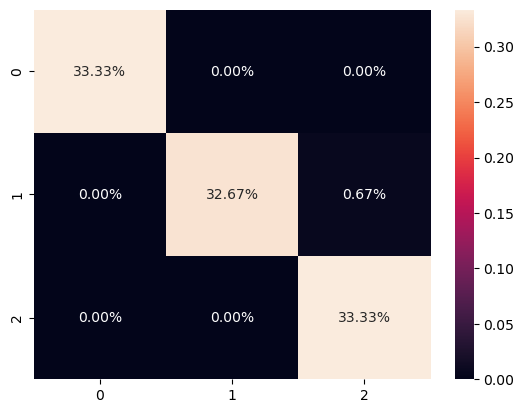

In [62]:
c = SVC(kernel='linear')
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

#### Polynomial kernel

accuracy = 97.33%


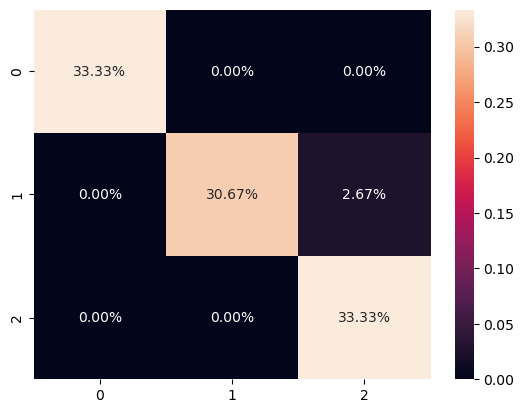

In [63]:
c = SVC(kernel='poly')
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

#### Sigmoid kernel (без ядра)

accuracy = 7.33%


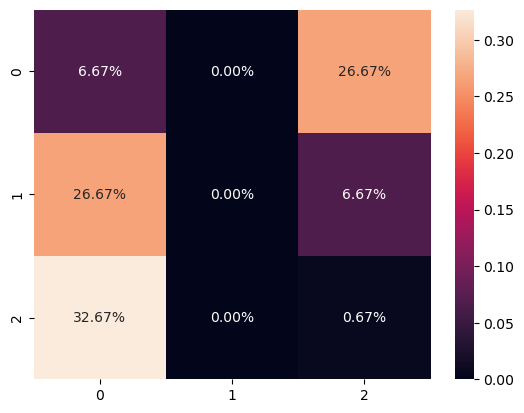

In [64]:
c = SVC(kernel='sigmoid')
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

### Метод ближайших соседей

#### k-ближайших соседей

accuracy = 96.00%


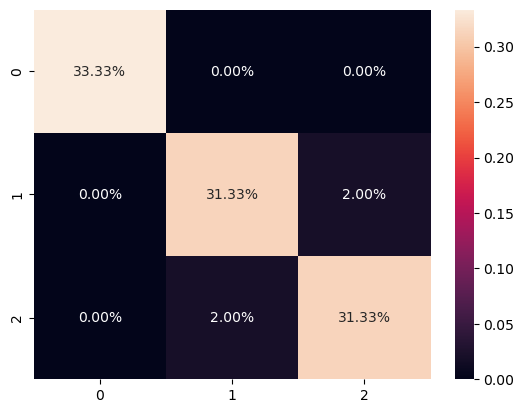

In [65]:
c = KNeighborsClassifier(n_neighbors=3)
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

#### В заданном радиусе

accuracy = 97.33%


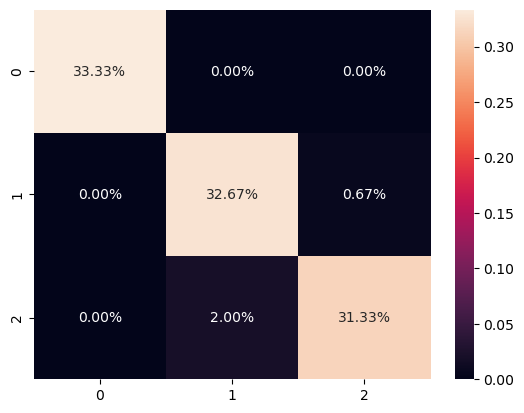

In [66]:
c = RadiusNeighborsClassifier()
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

### Многослойный перцептрон

accuracy = 98.67%


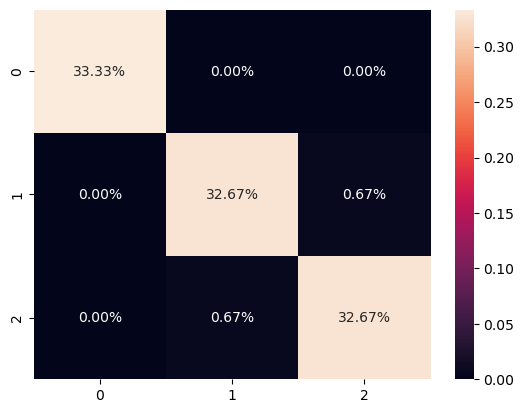

In [67]:
c = MLPClassifier(hidden_layer_sizes=(90, 60, 90), max_iter=666)
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

### Дерево решений

accuracy = 100.00%


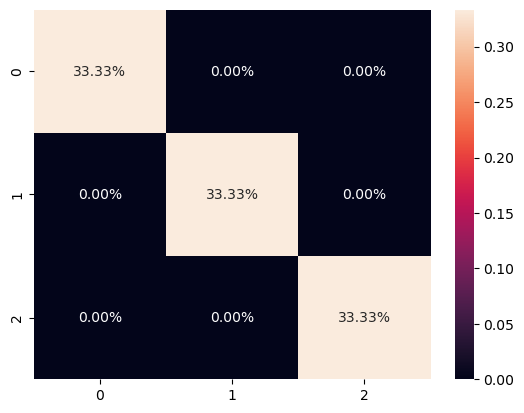

In [68]:
c = DecisionTreeClassifier()
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)

### Наивный Байесовский классификатор

accuracy = 96.00%


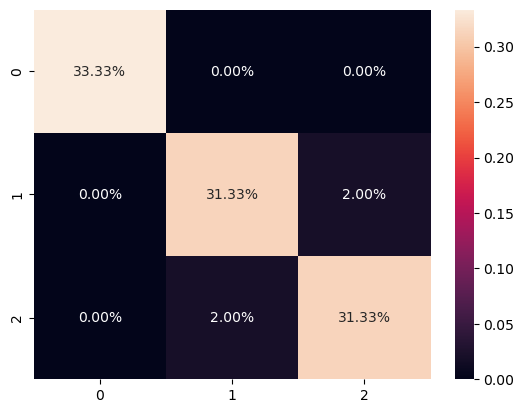

In [69]:
c = GaussianNB()
c.fit(x, y)
y_pred = c.predict(x)

rate(y, y_pred)